In [1]:
from pathlib import Path
from configuration import config

stage_yaml_file_name = 'stage.yaml'
stage_yaml_file_path = Path.cwd() / stage_yaml_file_name

In [2]:
Path.cwd()

WindowsPath('C:/Users/qcrew/Desktop/qcrew/tutorials')

In [3]:
cd ../qcore

C:\Users\qcrew\Desktop\qcrew\qcore


In [4]:
import matplotlib.pyplot as plt

from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.QuantumMachine import QuantumMachine
from qm.qua import *

from instruments import LabBrick, Sa124, Stage

## Instrument staging

In [5]:
# Staging
stage = Stage.load(stage_yaml_file_path)

device = stage.device_A
qubit = stage.device_A.qubit
rr = stage.device_A.rr
lb_qubit = stage.lb_qubit
lb_rr = stage.lb_rr
sa = stage.sa

# start the qm
qmm = QuantumMachinesManager()
qm = qmm.open_qm(config)

Trying to initialize lb_qubit
Connnected to LabBrick 25331
Setting initial parameters...
Successfully set frequency to 4.1650000E+09
Successfully set power to +15
LabBrick is ready to use.
Trying to initialize lb_rr
Connnected to LabBrick 25335
Setting initial parameters...
Successfully set frequency to 8.7571000E+09
Successfully set power to +13
LabBrick is ready to use.
Trying to initialize sa, will take about 5s...
Connnected to SA124B 19184645
Configured sweep! Sweep info: 
{'start': '7.7501000E+09', 'center': '8.0000000E+09', 'span': '5.000E+08', 'sweep_length': 2500, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}
2021-05-07 11:39:44,288 - qm - INFO - Performing health check
2021-05-07 11:39:44,306 - qm - INFO - Health check passed


## Get coarse sweep prior to tuning

In [6]:
with program() as qua_program:
    with infinite_loop_():
        play('CW', 'rr')
job = qm.execute(qua_program)


2021-05-07 11:39:44,600 - qm - INFO - Flags: 
2021-05-07 11:39:44,601 - qm - INFO - Executing high level program


Configured sweep! Sweep info: 
{'start': '8.6321000E+09', 'center': '8.7571000E+09', 'span': '2.500E+08', 'sweep_length': 1250, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


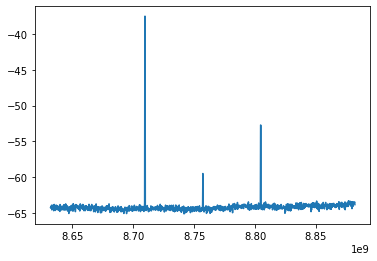

In [7]:
freqs, amps = sa.sweep(center=rr.lo_freq, span=250e6)
plt.plot(freqs, amps)

## Watch the new improved MixerTuner in action!!!

In [8]:
from instruments import MixerTuner
import time

In [9]:
# initialise mixer tuner with sa and qm
mixer_tuner = MixerTuner(sa=sa, qm=qm)

In [10]:
start_time = time.perf_counter()

2021-05-07 11:39:48,339 - qm - INFO - Flags: 
2021-05-07 11:39:48,339 - qm - INFO - Executing high level program
Coarse sweep before tuning qubit mixer...
Configured sweep! Sweep info: 
{'start': '4.0551000E+09', 'center': '4.1650000E+09', 'span': '2.200E+08', 'sweep_length': 1100, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


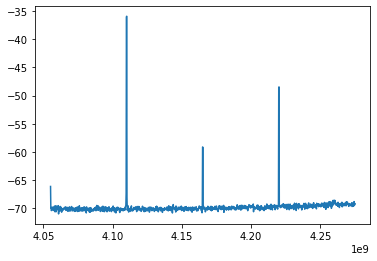

Sweep took 2.6626s

Zooming in to qubit LO leakage...
Configured sweep! Sweep info: 
{'start': '4.1629000E+09', 'center': '4.1650000E+09', 'span': '4.165E+06', 'sweep_length': 273, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


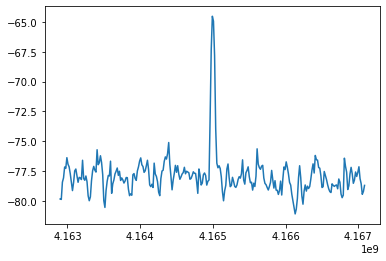

Sweep took 0.92495s

Floor (~mean): -77.89dB, stdev: 1.7715dB
amp: -64.941dB, contrast: 12.949dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
I: 0.0, Q: 0.0, contrast: 13.326
I: 0.0, Q: 0.1, contrast: 33.633
I: 0.1, Q: 0.0, contrast: 33.049
I: 0.1, Q: -0.1, contrast: 35.625
I: 0.025, Q: 0.05, contrast: 29.102
I: -0.075, Q: 0.05, contrast: 32.426
I: -0.03125, Q: 0.0375, contrast: 27.759
I: -0.05625, Q: -0.0125, contrast: 27.569
I: -0.025, Q: -0.05, contrast: 25.77
I: 0.03125, Q: -0.0375, contrast: 25.746
I: 0.05625, Q: 0.0125, contrast: 28.697
I: -0.0046875, Q: -0.034375, contrast: 20.664
I: -0.035937, Q: 0.003125, contrast: 23.826
I: -0.019141, Q: -0.0070312, contrast: 17.754
I: -0.014453, Q: 0.027344, contrast: 24.756
I: -0.0071289, Q: -0.018945, contrast: 12.057
I: 0.012012, Q: -0.011914, contrast: 15.857
I: 0.0042236, Q: -0.010693, contrast: 10.312
I: -0.0029053, Q: -0.029639, contrast: 19.00

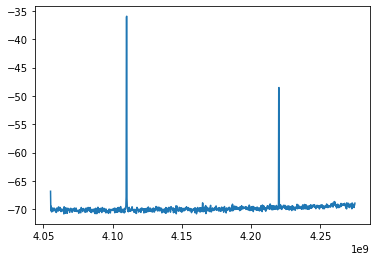

Sweep took 2.507s

Zooming in to qubit SB leakage...
Configured sweep! Sweep info: 
{'start': '4.2178692E+09', 'center': '4.2200000E+09', 'span': '4.220E+06', 'sweep_length': 276, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


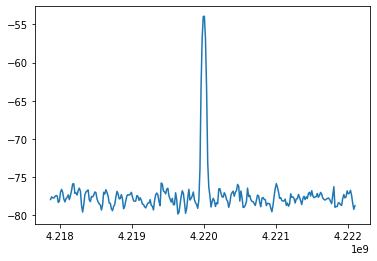

Sweep took 0.9222s

Floor (~mean): -77.328dB, stdev: 3.0551dB
amp: -53.922dB, contrast: 23.406dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
G: 0.0, P: 0.0, contrast: 23.551
G: 0.0, P: 0.1, contrast: 22.134
G: 0.1, P: 0.0, contrast: 26.322
G: -0.1, P: 0.1, contrast: 15.419
G: -0.2, P: 0.15, contrast: 8.3816
G: -0.2, P: 0.25, contrast: 20.983
G: -0.4, P: 0.3, contrast: 28.856
G: -0.1, P: 0.15, contrast: 16.165
G: -0.1, P: 0.05, contrast: 17.817
G: -0.125, P: 0.1, contrast: 12.914
G: -0.225, P: 0.1, contrast: 9.6375
G: -0.3, P: 0.15, contrast: 19.051
G: -0.16875, P: 0.1125, contrast: 0.942
G: -0.14375, P: 0.1625, contrast: 12.718
G: -0.20469, P: 0.11563, contrast: 3.495
G: -0.17344, P: 0.078125, contrast: 9.9025
G: -0.19336, P: 0.13203, contrast: 1.8633
G: -0.15742, P: 0.12891, contrast: 5.4379
G: -0.19287, P: 0.11895, contrast: 2.8645
G: -0.16924, P: 0.12559, contrast: 2.489
G: -0.17515, P: 0.12

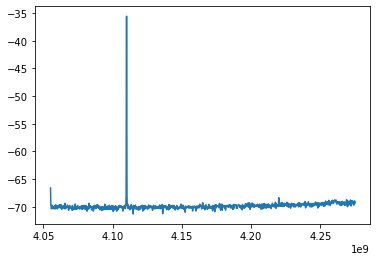

Sweep took 2.512s

2021-05-07 11:40:11,484 - qm - INFO - Flags: 
2021-05-07 11:40:11,484 - qm - INFO - Executing high level program
Coarse sweep before tuning rr mixer...
Configured sweep! Sweep info: 
{'start': '8.6621000E+09', 'center': '8.7571000E+09', 'span': '1.900E+08', 'sweep_length': 950, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


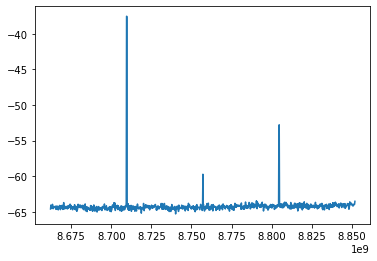

Sweep took 2.2407s

Zooming in to rr LO leakage...
Configured sweep! Sweep info: 
{'start': '8.7527000E+09', 'center': '8.7571000E+09', 'span': '8.757E+06', 'sweep_length': 571, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


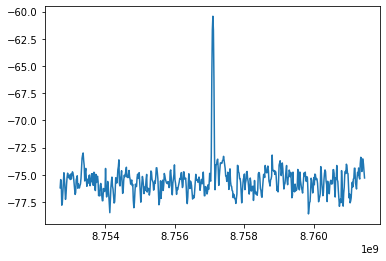

Sweep took 0.95351s

Floor (~mean): -75.556dB, stdev: 1.5328dB
amp: -60.426dB, contrast: 15.13dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
I: 0.0, Q: 0.0, contrast: 15.527
I: 0.0, Q: 0.1, contrast: 35.195
I: 0.1, Q: 0.0, contrast: 34.178
I: 0.1, Q: -0.1, contrast: 36.174
I: 0.025, Q: 0.05, contrast: 30.608
I: -0.075, Q: 0.05, contrast: 34.066
I: -0.03125, Q: 0.0375, contrast: 29.6
I: -0.05625, Q: -0.0125, contrast: 30.695
I: 0.0046875, Q: 0.034375, contrast: 27.239
I: 0.035937, Q: -0.003125, contrast: 24.462
I: 0.03125, Q: -0.0375, contrast: 25.49
I: 0.024609, Q: -0.019531, contrast: 20.169
I: -0.011328, Q: -0.016406, contrast: 20.589
I: 0.00048828, Q: -0.013086, contrast: 12.14
I: -0.024121, Q: 0.0064453, contrast: 24.785
I: 0.012427, Q: -0.013037, contrast: 9.9965
I: 0.012915, Q: -0.026123, contrast: 18.904
I: 0.0032288, Q: -0.0065308, contrast: 8.1681
I: 0.015167, Q: -0.0064819, contrast: 

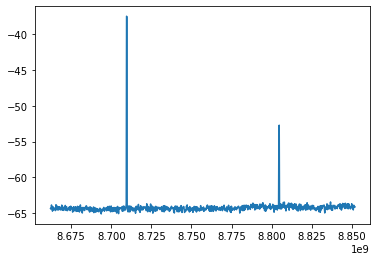

Sweep took 2.0967s

Zooming in to rr SB leakage...
Configured sweep! Sweep info: 
{'start': '8.8001769E+09', 'center': '8.8046000E+09', 'span': '8.805E+06', 'sweep_length': 574, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


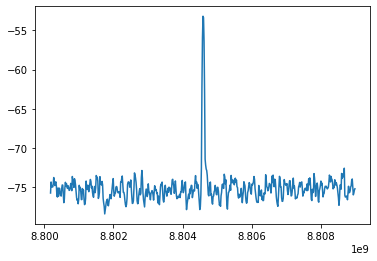

Sweep took 0.96274s

Floor (~mean): -75.181dB, stdev: 2.1375dB
amp: -53.366dB, contrast: 21.815dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
G: 0.0, P: 0.0, contrast: 21.97
G: 0.0, P: 0.1, contrast: 22.578
G: 0.1, P: 0.0, contrast: 25.795
G: -0.1, P: 0.1, contrast: 17.294
G: -0.2, P: 0.15, contrast: 20.569
G: -0.1, P: 0.0, contrast: 13.714
G: -0.15, P: -0.05, contrast: 14.626
G: -0.2, P: 0.1, contrast: 16.436
G: -0.2, P: 0.0, contrast: 9.0755
G: -0.25, P: -0.05, contrast: 18.471
G: -0.1, P: -0.1, contrast: 20.459
G: -0.175, P: 0.05, contrast: 6.703
G: -0.275, P: 0.05, contrast: 19.199
G: -0.14375, P: 0.0125, contrast: 5.7728
G: -0.11875, P: 0.0625, contrast: 14.288
G: -0.17969, P: 0.015625, contrast: 2.9654
G: -0.14844, P: -0.021875, contrast: 11.037
G: -0.16836, P: 0.032031, contrast: 1.7431
G: -0.2043, P: 0.035156, contrast: 9.6845
G: -0.15889, P: 0.018164, contrast: 0.8311
G: -0.14756, P: 0

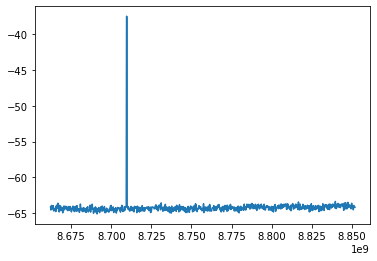

Sweep took 2.0701s



In [11]:
# this tunes both the lo and sb of the qubit and the rr
# you can pass tune() with any number of QuantumElement objects
mixer_tuner.tune(qubit, rr)

# this tunes only lo of the given elements
#mixer_tuner.tune_lo(qubit, rr)

# this tunes only sb of the given elements
#mixer_tuner.tune_sb(qubit, rr)

In [12]:
elapsed_time = time.perf_counter() - start_time
print('Tuning took {:.5}s'.format(elapsed_time))

Tuning took 51.806s


## Changing default minimization parameters

For most situations, the default minimization parameters SHOULD work well. However, if they shouldn't work in the near future, you can still change them from the outside. Here is a list of these parameters with a brief description:

1. `method`: minimization algorithm, currently 'Nelder-Mead'. See documentation https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html. This algorithm is quite good at finding minima for an n-dim problem with noisy values and no analytically available objective function gradient, which fits our problem description. Another algo we could consider in the future, if Nelder-Mead does not work well, is 'Powell'. But my hunch is we won't need to shop beyond 'Nelder-Mead'. If you choose to change this parameter to 'Powell', you will need to change the logic of the `_minimize()` internal method in MixerTuner class, specifically the arguments of the scipy.optimize.minimize() method that is called within `_minimize()`. 

2. `init_simplex_lo`: initial simplex for minimizing lo leakage. An np array of shape (3, 2), which defines the vertices of a triangle (since our minimization is along 2 dimensions, our simplex has 2+1 = 3 points). 

3. `init_simplex_sb`: initial simplex for minimizing sb leakage. Also an np array of shape (3, 2). 

NOTE: the default values of the initial simplexes have been informed by (1) offset bounds (OPX limitation), (2) scans of the entire function landscape (see "20210429 mixer tuning deepdive" in Lab Notes on Notion), and (3) values used by QM in their automatic mixer calibration script (https://github.com/qua-platform/qua-libs/blob/automatic-mixer-calibration/examples/mixer-calibration/configuration.py). So change these initial simplexes with caution - you may cause inadvertant overflows or get your minimization algo stuck in a local optimum if you change the initial simplexes arbitrarily. 

4. `xatol`: absolute error in xopt between iterations that is acceptable for convergence. That is, our algo stops as soon as |x(n) - x(n+1)| < xatol. Here x(n) and x(n+1) represent the offsets (the parameters to be minimized) between two successive function calls. In simpler words, this parameters decides how finely (or coarsely) we want our offsets to be set during the minimization algorithm's runtime. If you set them too coarse, you might converge on a local optimum. If you set them too fine, you might not converge at all. The default value for xatol is the same as that used in the scipy.optimize library, it seems to work fine.

5. `fatol`: absolute error in func(xopt) between iterations that is acceptable. That is, our algo stops as soon as |f(x_n) - f(x_(n+1))| < fatol. Here f(x_n) and f(x_n+1)) represent outputs of two successive function calls. In simpler words, our mixer tuner tunes to within this tolerance. The default value is set to 1 (unit is dB). My hunch is we shouldn't set this greater than 3 if we want satisfactory tuning. We also shouldn't set it too low, if not our solution does not converge (and beyond a certain value, we also go beyond the spectrum analyser's resolution and start sampling noise...). In short, values of 1, 2, or 3 work just fine...

6. `max_iter`: maximum number of iterations our minimization step should carry out. Default is 100, which is frankly more than enough. So far, minimization converges in fewer than 30 iterations. If minimization does not converge even after 100 iterations, something else (such as initial simplex value or fatol) probably needs to be optimized further. 

In [13]:
import numpy as np
# first, create a dictionary of minimization parameters
# for future use, you may just copy this dict structure and simply change the values
# here, the values given are equal to the default values in qcore's mixer_tuner.py
minimization_parameters ={
    'method': 'Nelder-Mead',
    'init_simplex_lo': np.array([[0.0, 0.0], [0.0, 0.1], [0.1, 0.0]]),
    'init_simplex_sb': np.array([[0.0, 0.0], [0.0, 0.1], [0.1, 0.0]]),
    'xatol': 0.0001,
    'fatol': 1,
    'max_iter': 100
}

In [14]:
# now, initialize mixer tuner by unpacking the dict above
# and watch it tune!
#custom_mixer_tuner = MixerTuner(sa=sa, qm=qm, **minimization_parameters)
#custom_mixer_tuner.tune(qubit, rr)

## What to do if mixer tuning still does not work?

Hmm, if the mixer can't be tuned even after customizing the minimization parameters (esp initial_simplex and fatol), then one may still salvage the situation by inspecting the print stream of the minimization process, which contains a lot of useful information. You may:

1. Check the printed values of the offsets applied during each function evaluation. Maybe one of these offset pairs somehow yields a contrast that is low enough to be acceptable.


2. Check the signal level of the zoomed in spectrum centered around the frequency component we wish to tune. The MixerTuner prints the values of the `floor` (mean of all sampled amps), `stdev` (of all sampled amps), `amp` (sampled at the freq component we wish to tune), and `contrast` (difference bw `amp` and `floor`). See if the values printed are reasonable, if they are not, then most likely, the SA is not sampling the amplitudes accurately!